Import the NIAK libraries. This notebook require:
 * jupyter with the octave kernel
 * an install of Octave with the image and statistics toolboxes from octave forge
 * [data from the metaad project](https://simexp.slack.com/files/amanbadhwar/F1DJYG0C8/clusterlevel_10k_less_conservative_mask.zip)

In [1]:
cd /home/pbellec
build_path niak psom

Adding library niak to the search path.

Adding library psom to the search path.



Now build file names for p-value maps as well as "stats maps"

In [20]:
path_data = '/home/pbellec/data/metaad/clusterlevel_10k_less_conservative_mask/';
list_contrast = { '20160522_MCI_increase_clusterlevel_10k_less_conservative_mask' , ...
                  '20160523_MCI_decrease_clusterlevel_10k_less_conservative_mask' , ...
                  '20160601_AD_decrease_clusterlevel_10k_less_conservative_mask' , ...
                  '20160602_AD_increase_clusterlevel_10k_less_conservative_mask' };
list_p = cell(size(list_contrast));
list_s = cell(size(list_contrast));
for cc = 1:length(list_contrast)
  contrast = list_contrast{cc};
  file = [path_data contrast filesep '*_P.nii'];
  file = dir(file);
  list_p{cc} = file.name;
  if isempty(file)
      error('Could not find file %s',file)
  end
  file = [path_data contrast filesep '*_10k.nii'];
  file = dir(file);
  list_s{cc} = file.name;
  if isempty(file)
      error('Could not find file %s',file)
  end
end

Finally read the input volumes and convert them into a z image

ans =    5.0901e-07
    niak_icdf_normal at line 82 column 1
ans =    1.1520e-06
ans =    1.6950e-08
ans =    3.1452e-07


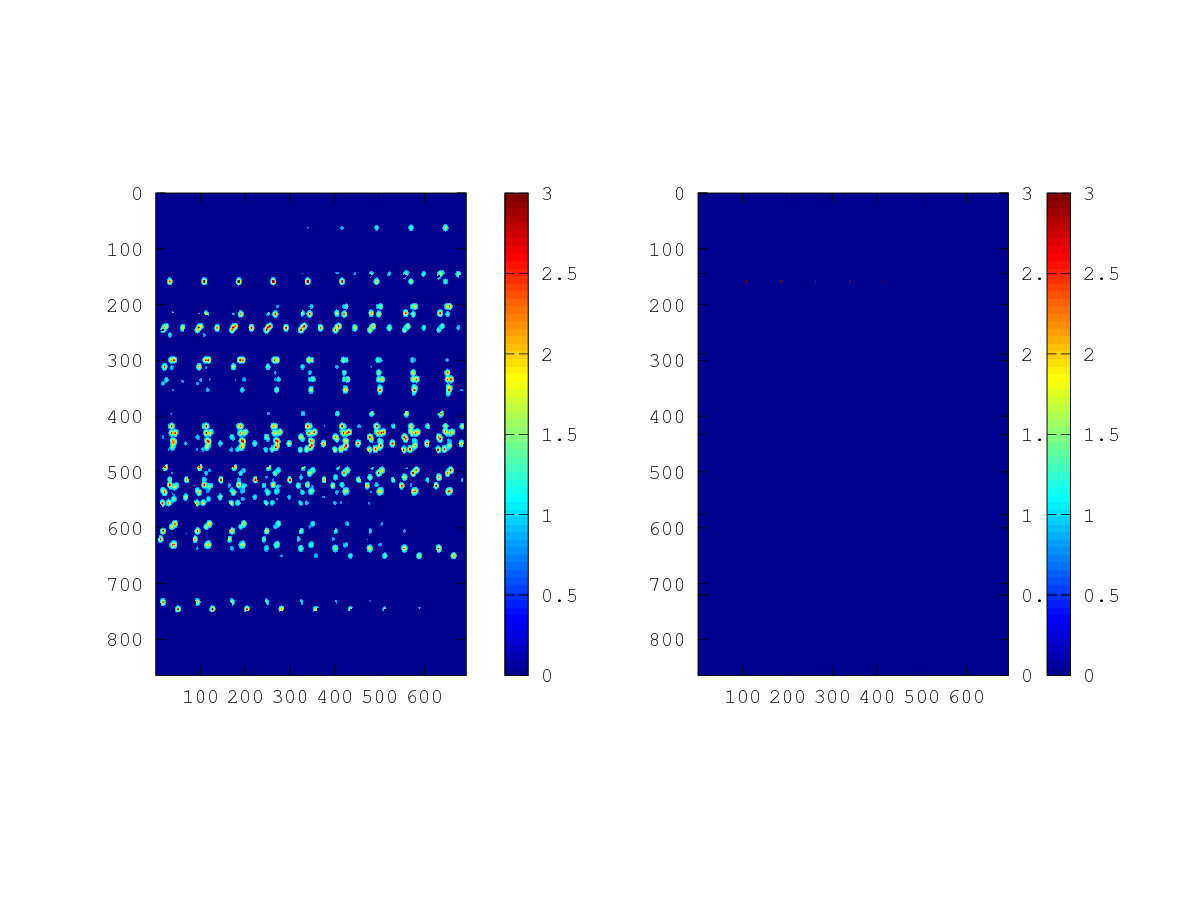

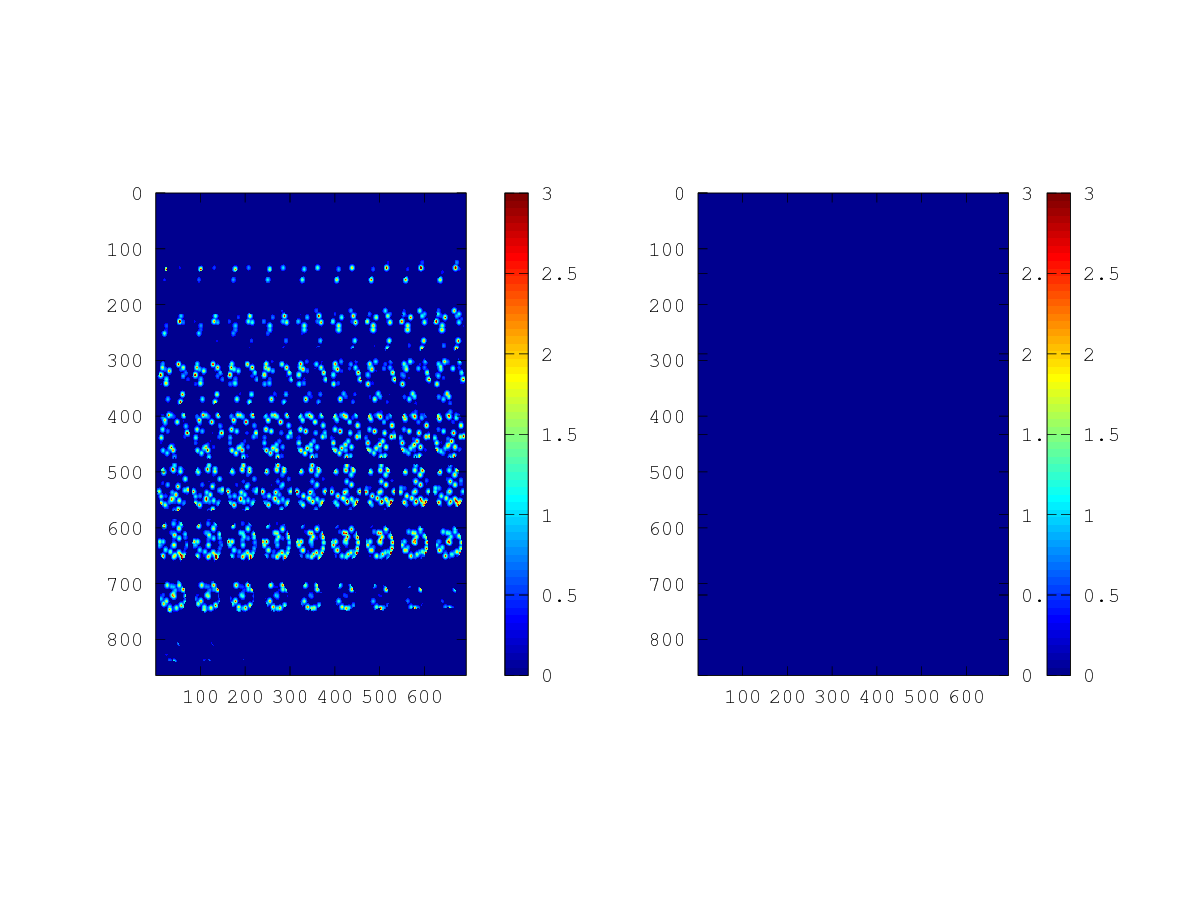

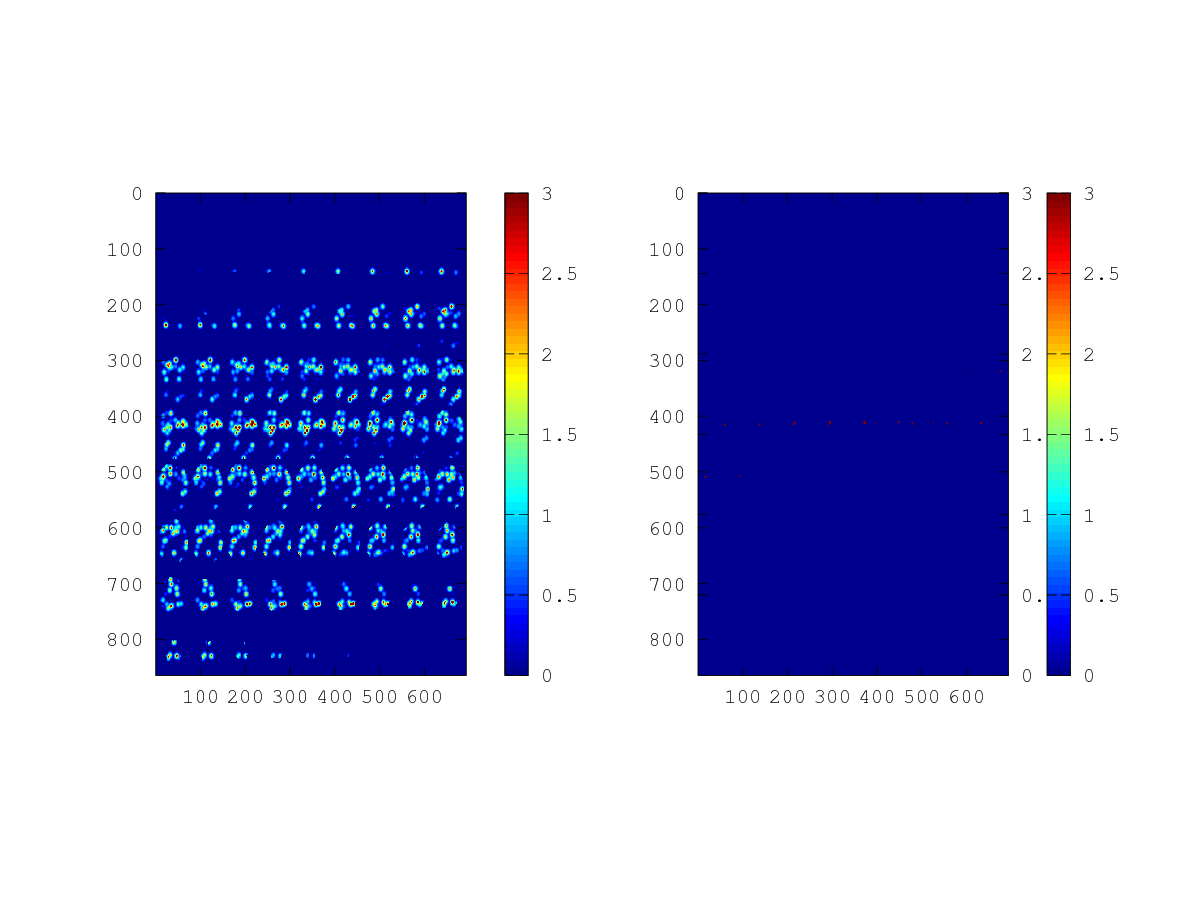

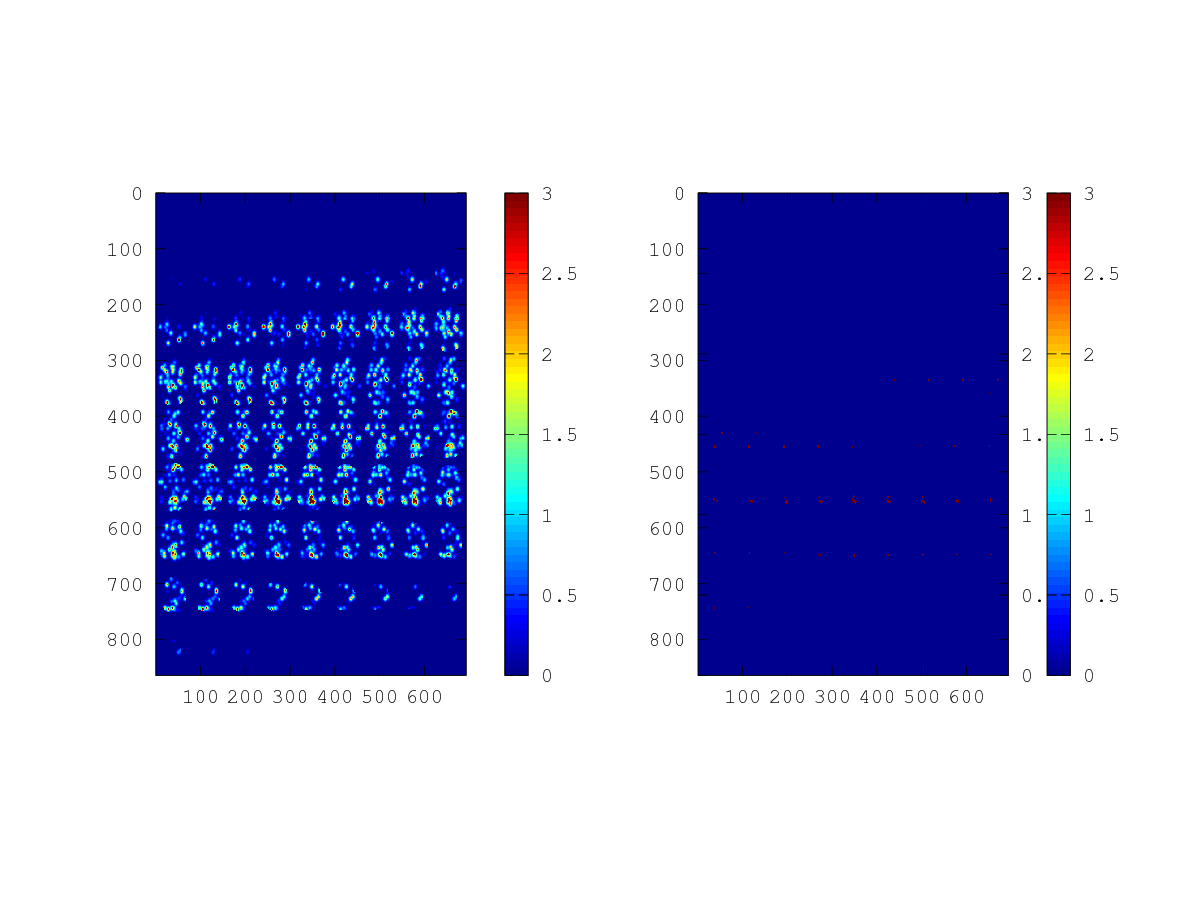

In [25]:
for cc = 1:length(list_file)
  contrast = list_contrast{cc};
  file_s = [path_data contrast filesep list_s{cc}];
  [hdr,vol_s] = niak_read_vol(file_s);
  mask = vol_s>0;
  file = [path_data contrast filesep list_p{cc}];
  [hdr,vol] = niak_read_vol(file);
  figure
  subplot(1,2,1)
  opt_v.vol_limits = [0 3];
  niak_montage(-log10(vol),opt_v)
  min(vol(:))
  z = reshape(-niak_icdf_normal(vol(:),0,1),size(vol));
  z(mask==0) = 0;
  subplot(1,2,2)
  niak_montage(z,opt_v)
  [path_f,name_f,ext_f] = fileparts(file);
  name_f(end) = 'Z';
  hdr.file_name = [path_f filesep name_f ext_f];
  niak_write_vol(hdr,z);
end

In [8]:
help niak_montage

'niak_montage' is a function from the file /home/pbellec/git/niak/commands/visualization/niak_montage.m

 Visualization of a 3D volume in a montage style (all slices in one image)

 SYNTAX: [] = NIAK_MONTAGE(VOL,OPT)

 _________________________________________________________________________
 INPUTS:

 VOL           
       (3D array) a 3D volume

 OPT           
       (structure, optional) has the following fields:

       NB_ROWS 
           (integer, default : optimized for a square montage) the number 
           of rows in the montage.
               
       NB_COLUMNS 
           (integer, default : optimized for a square montage) the number 
           of columns in the montage.

       VOXEL_SIZE 
           (vector 1*3, default [1 1 1]) resolution in x, y and z 
           dimensions (used if smoothing the volume).

       TYPE_SLICE 
           (string, default 'axial') the plane of slices in the montage. 
           Available options : 'axial', 'coronal', 'sagital', 'all'. 